In [2]:
from visualization_result import predict, plot, plot_colortable
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-y_nbo13a because the default path (/gpfs/home/yz7005/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:
color_mapping = {'Mandible': 'yellow',
                 'Parotid_L': 'greenyellow', 
                 'Parotid_R': 'lime',  
                 'BrainStem': 'orange', 
                 'SpinalCord': 'peru', 
                 'Submandibula_L': 'red', 
                 'Submandibula_R': 'turquoise', 
                 'OpticNerve_L': 'lightskyblue', 
                 'OpticNerve_R': 'violet', 
                 'OpticChiasm': 'pink'
                }

In [4]:
image_folder = '/gpfs/data/yuanlab/projects/HN_autocontour/data/processed/HN117'

In [5]:
organ_subject, predictions, targets = predict(image_folder)

Predicting for Mandible


  0%|          | 0/1 [00:00<?, ?it/s]

/gpfs/data/yuanlab/projects/HN_autocontour/notebooks/3D_Unet_Dante/util.py:13: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  targets = (batch['mask']['data'] // 255).to(device)
/gpfs/share/apps/anaconda3/gpu/5.2.0/envs/yz7005/lib/python3.9/site-packages/unet/decoding.py:146: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  half_crop = cr

dice mean: 0.893
dice std: 0.000
ppv mean: 0.818
ppv std: 0.000
sensitivity mean: 0.983
sensitivity std: 0.000
Predicting for Parotid_L


  0%|          | 0/1 [00:00<?, ?it/s]

dice mean: 0.614
dice std: 0.000
ppv mean: 0.447
ppv std: 0.000
sensitivity mean: 0.979
sensitivity std: 0.000
Predicting for Parotid_R


  0%|          | 0/1 [00:00<?, ?it/s]

dice mean: 0.695
dice std: 0.000
ppv mean: 0.545
ppv std: 0.000
sensitivity mean: 0.958
sensitivity std: 0.000
Predicting for BrainStem


  0%|          | 0/1 [00:00<?, ?it/s]

dice mean: 0.000
dice std: 0.000
ppv mean: 0.000
ppv std: 0.000
sensitivity mean: 0.000
sensitivity std: 0.000
Predicting for SpinalCord


  0%|          | 0/1 [00:00<?, ?it/s]

dice mean: 0.719
dice std: 0.000
ppv mean: 0.563
ppv std: 0.000
sensitivity mean: 0.995
sensitivity std: 0.000
Predicting for Submandibula_L


  0%|          | 0/1 [00:00<?, ?it/s]

dice mean: 0.556
dice std: 0.000
ppv mean: 0.409
ppv std: 0.000
sensitivity mean: 0.868
sensitivity std: 0.000
Predicting for Submandibula_R


  0%|          | 0/1 [00:00<?, ?it/s]

dice mean: 0.581
dice std: 0.000
ppv mean: 0.442
ppv std: 0.000
sensitivity mean: 0.845
sensitivity std: 0.000
Predicting for OpticNerve_L


  0%|          | 0/1 [00:00<?, ?it/s]

dice mean: 0.270
dice std: 0.000
ppv mean: 0.198
ppv std: 0.000
sensitivity mean: 0.424
sensitivity std: 0.000
Predicting for OpticNerve_R


  0%|          | 0/1 [00:00<?, ?it/s]

dice mean: 0.555
dice std: 0.000
ppv mean: 0.496
ppv std: 0.000
sensitivity mean: 0.629
sensitivity std: 0.000
Predicting for OpticChiasm


  0%|          | 0/1 [00:00<?, ?it/s]

dice mean: 0.213
dice std: 0.000
ppv mean: 0.194
ppv std: 0.000
sensitivity mean: 0.236
sensitivity std: 0.000


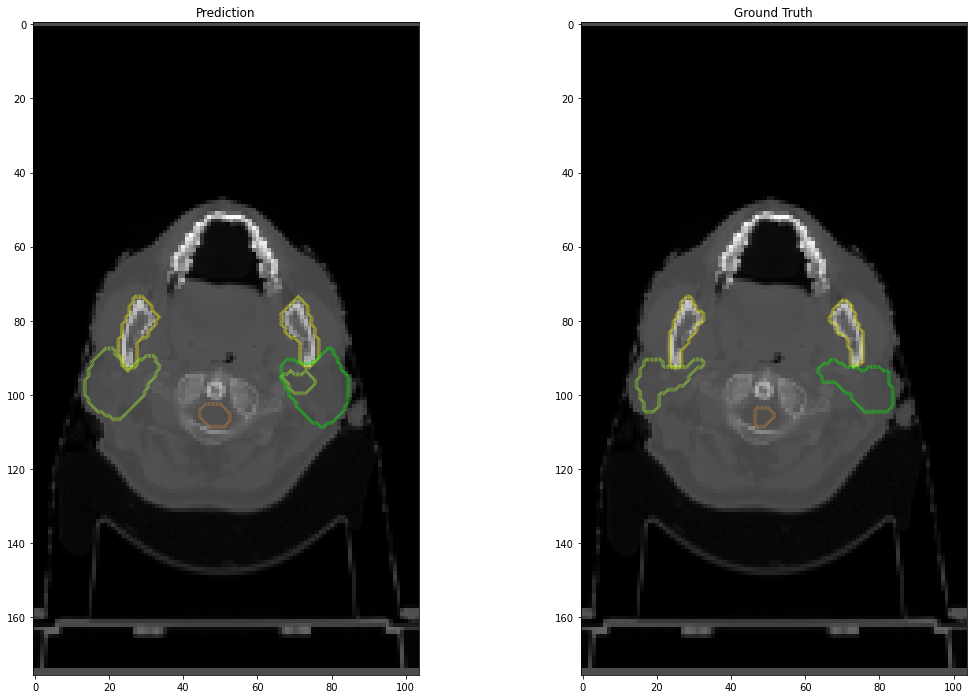

In [17]:
axslice = 50
plot(organ_subject, predictions, targets, axslice, color_mapping = color_mapping)

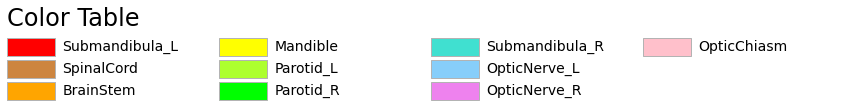

In [8]:
plot_colortable(color_mapping, 'Color Table')
plt.show()

In [9]:
import nibabel as nib
import numpy as np

In [10]:
new_image = nib.Nifti1Image(organ_subject[0]['img']['data'][0].cpu().numpy(), affine = np.eye(4))
nib.save(new_image, '/gpfs/data/yuanlab/projects/HN_autocontour/EVALPATIENT/HN117/image.nii.gz')

In [11]:
for organ in predictions:
    new_image = nib.Nifti1Image(predictions[organ][0, 1, :, :, :].cpu().numpy(), affine = np.eye(4))
    nib.save(new_image, f'/gpfs/data/yuanlab/projects/HN_autocontour/EVALPATIENT/HN117/prediction_{organ}.nii.gz')